<a href="https://colab.research.google.com/github/csce585-mlsystems/CSCE585ProjectROI/blob/michelleBranch/Model_Training_Apple_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Running experiments in ModelDevelopment Directory



Cloned the repository

In [ ]:
!git clone https://github.com/csce585-mlsystems/CSCE585ProjectROI

Cloning into 'CSCE585ProjectROI'...
remote: Enumerating objects: 563, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 563 (delta 107), reused 165 (delta 57), pack-reused 304 (from 1)
Receiving objects: 100% (563/563), 1.50 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (248/248), done.


After cloning, you might need to navigate into the repository's directory. Then, install any necessary Python packages. Often, these are listed in a `requirements.txt` file. You may need to check the repository's documentation for the exact file name or commands.

In [ ]:
# Repo directories
import os
os.chdir('CSCE585ProjectROI')


Here I'm uploading my dependencies

In [ ]:
!pip install reactpy reactpy-router flask llama-cpp-python TensorFlow

In [ ]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


Verified that the notebook is running from python 3.12.12

Uploading Specific libaries

In [ ]:
# Body of neccessary imports
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np #<-- May be optional not sure as of 10/13/25.
# import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

Uploaded the model from local computer

In [ ]:
from google.colab import files
model = files.upload()

Saving set1FinalCopy.py to set1FinalCopy.py


In [ ]:
from google.colab import files
apple = files.upload()

Saving apple_Metrics.csv to apple_Metrics.csv


In [ ]:
from google.colab import files
google = files.upload()

Step 1: Split data into training group, validation and test sets

X : Features

y : Target variable of dataset

In [ ]:
import numpy as np
import pandas as pd
import io
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import io

# Path to the apple_Metrics.csv file in the cloned repository
file_path = 'apple_Metrics.csv'

# Read the CSV directly from the file system
df_raw = pd.read_csv(file_path)

# Set the 'Metric' column as the index, then transpose the DataFrame
apple = df_raw.set_index('Metric').T

# The index is now dates; optionally, reset it to make 'Date' a column
apple.index.name = 'Date'
apple = apple.reset_index()

# Convert 'Date' column to datetime objects and sort
apple['Date'] = pd.to_datetime(apple['Date'])
apple = apple.sort_values(by='Date')

# Strip any potential whitespace from column names for easier access
apple.columns = apple.columns.str.strip()

print("Apple DataFrame processed successfully from file system.")
# You may want to inspect apple.head() and apple.columns here to confirm the structure.

Apple DataFrame processed successfully from file system.


In [ ]:
for fn in google.keys():
  google = pd.read_csv(io.StringIO(google[fn].decode('utf-8')))

Here I'm defining X and y values for the Apple dataset where my metrics will be X values and dates will be y value

I extracted my feature columns

In [ ]:
feature_columns = [
    "Operating Cash Flow",
    "Capital Expenditure",
    "Free Cash Flow",
    "Total Debt",
    "Common Stockholder Equity",
    "Total Liabilities Net Minority Interest",
    "Total Assets",
    "Shares Outstanding",
    "Net Income Common Stockholders",
    "Diluted Average Shares",
    "Diluted EPS"
]

# Extract X (features) and y (target 'Price') from the apple DataFrame
X_data = apple[feature_columns]
y_data = apple['Price']

print("Features (X_data) head:\n", X_data.head())
print("\nTarget (y_data) head:\n", y_data.head())

Features (X_data) head:
 Metric  Operating Cash Flow  Capital Expenditure  Free Cash Flow   Total Debt  \
4                28858000.0           -2151000.0      26707000.0  101304000.0   
3                26811000.0           -2908000.0      23903000.0  106629000.0   
2                29935000.0           -2940000.0      26995000.0   96799000.0   
1                23952000.0           -3071000.0      20881000.0   98186000.0   
0                27867000.0            3462000.0      24405000.0  101698000.0   

Metric  Common Stockholder Equity  Total Liabilities Net Minority Interest  \
4                      66708000.0                              264904000.0   
3                      56950000.0                              308030000.0   
2                      66758000.0                              277327000.0   
1                      66796000.0                              264437000.0   
0                      65830000.0                              265665000.0   

Metric  Total Asset

In [ ]:
from sklearn.model_selection import train_test_split

# Perform the train-test split on the actual data
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.25, random_state=42)

# Display the shapes to confirm
print("Shape of X_train_data:", X_train_data.shape)
print("Shape of y_train_data:", y_train_data.shape)
print("Shape of X_test_data:", X_test_data.shape)
print("Shape of y_test_data:", y_test_data.shape)

Lets plot the training data

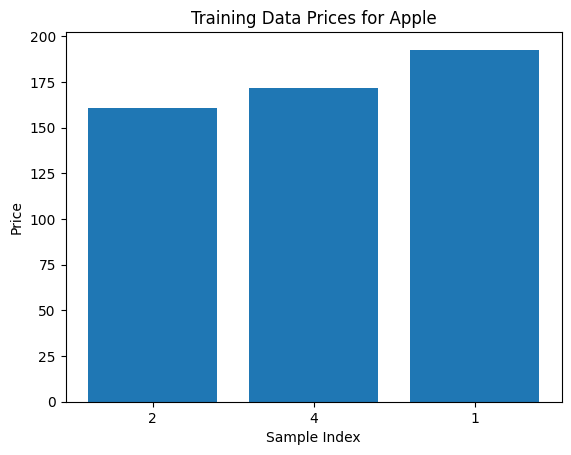

In [77]:
import matplotlib.pyplot as plt



# Use the index of y_train_data as x-axis labels for the bar plot
plt.bar(X_train_data.index.astype(str), y_train_data)
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Training Data Prices for Apple")
plt.show()



Now I have to define my validation data which is 50% of combined dataset

In [ ]:
X_main = X_train_data, X_test_data
y_main = y_train_data, y_test_data

X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, test_size=0.25, random_state=42)

print(X_train_data, X_val, y_train, y_val)

In [ ]:
# Validation set is 50% of combined dataset
x_val, x_test, y_val, y_test = train_test_split(X_main,
                                                y_main,
                                                test_size=0.5,
                                                random_state=42)
print(x_val, x_test, y_val, y_test)

Lets plot the validation data

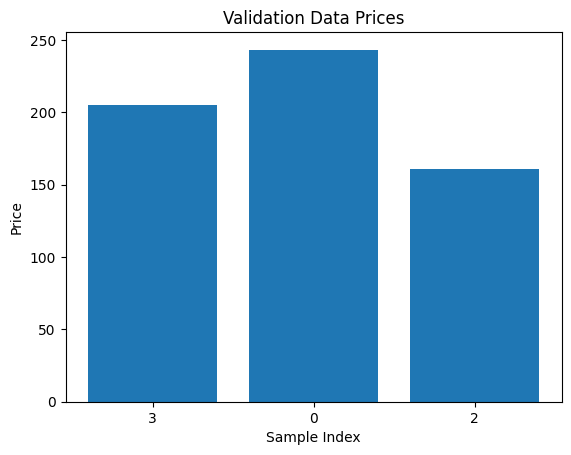

In [78]:
import matplotlib.pyplot as plt

# Use the index of y_val as x-axis labels for the bar plot
plt.bar(y_val.index.astype(str), y_val)
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Validation Data Prices")
plt.show()

Apple Data

Training : X_train, y_train

Validation : X_main, y_main

Test : X_test, y_test

Step 2: Use data leakage prevention techniques such as walk forward cross validation

Update I'm going to go with standard walk forward validation since the current dataset we have is small

In [80]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def perform_walk_forward_validation(X_full, y_full, training_window_size, testing_window_size, step_size):
    errors = []
    predictions = []

    # Ensure data is a pandas Series or DataFrame with a time-based index
    # For this example, assuming 'data' is a Series where the index represents time

    # The loop should iterate through the full dataset, stepping by step_size
    # We need to ensure there's enough data for at least one training and testing window
    for i in range(training_window_size, len(X_full) - testing_window_size + 1, step_size):
        # Define training and testing windows from the full dataset
        X_train_window = X_full.iloc[i - training_window_size : i]
        y_train_window = y_full.iloc[i - training_window_size : i]

        X_test_window = X_full.iloc[i : i + testing_window_size]
        y_test_window = y_full.iloc[i : i + testing_window_size]

        # Handle cases where windows might be empty (e.g., at the very start/end with small data)
        if X_train_window.empty or X_test_window.empty or y_train_window.empty or y_test_window.empty:
            continue

        # Train the model
        model = LinearRegression()
        model.fit(X_train_window, y_train_window)

        # Make predictions
        y_pred = model.predict(X_test_window)

        # Evaluate and store results
        # Ensure y_test_window and y_pred have compatible shapes/types for MSE
        mse = mean_squared_error(y_test_window, y_pred)
        errors.append(mse)
        predictions.extend(y_pred)

    return errors, predictions

training_window = 2 # Adjusted for small dataset
testing_window = 1   # Adjusted for small dataset
step = 1             # Adjusted for small dataset

# Call the function with the full X_data and y_data, and the step
errors, predictions = perform_walk_forward_validation(X_data, y_data, training_window, testing_window, step)

print(f"Mean Squared Errors for each fold: {errors}")
print(f"Average MSE: {sum(errors) / len(errors) if errors else 'N/A'}")

Mean Squared Errors for each fold: [6856.300233959592, 5683.117399745686, 409.9760598490104]
Average MSE: 4316.464564518096


Lets plot out the walk forward technique

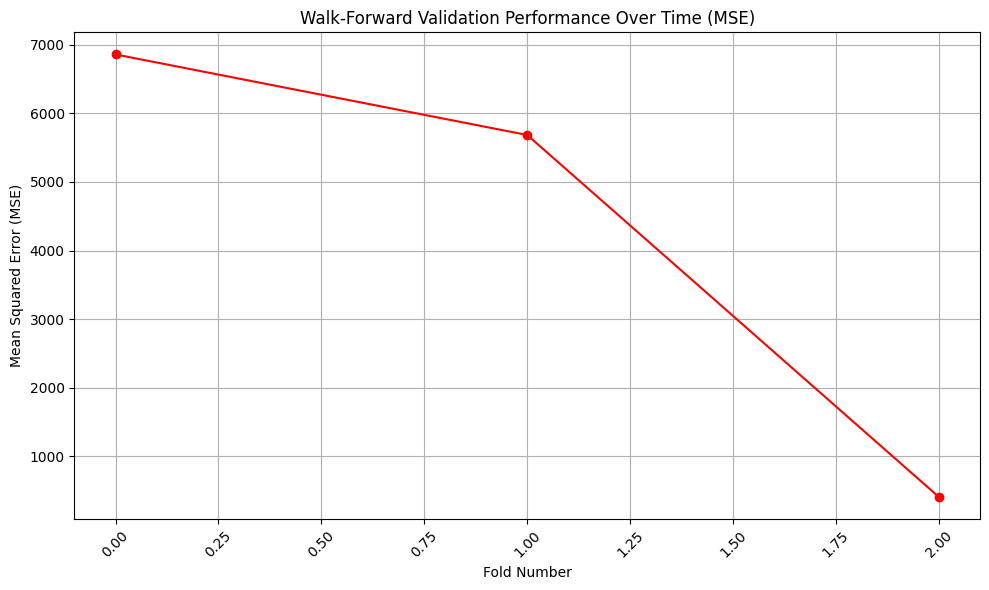

In [87]:
import matplotlib.pyplot as plt

# Plotting walk-forward validation performance
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, marker='o', linestyle='-', color='red')
plt.title('Walk-Forward Validation Performance Over Time (MSE)')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 3: Hypertune the parameters using the validation data set

I'm going to use the random search technique since we are working with financial stock data

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and the linear model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_model', Ridge()) # Or Lasso, etc.
])


In [89]:
from scipy.stats import uniform, loguniform
from sklearn.linear_model import Ridge

# Define the search space
param_distributions = {
    'linear_model__alpha': loguniform(1e-4, 1e3), # Example for Ridge
    # Add other parameters for other models as needed
}


In [90]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=100, # Number of random combinations to try
    cv=3, # Number of cross-validation folds, changed from 5 to 3
    scoring='neg_mean_squared_error', # Or other scoring metrics
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

# Fit the search object to your training data using the correct variables
random_search.fit(X_train_data, y_train_data)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('linear_model', Ridge())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'linear_model__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7da6e82ab4a0>},
                   random_state=42, scoring='neg_mean_squared_error')

Since we are measuring numerical values it would be best to use regression based evaluations such as MSE

In [91]:
import yfinance as yf
from datetime import timedelta

Fetch yfinance data then pass it thru the fucntion fetch market data so it can make future predicitions

In [92]:
pip install yfinance

In [93]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "AAPL"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data)

# Fetch basic financials
financials = ticker.financials.dropna()
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
actions = ticker.actions.dropna()
print("\nStock Actions:")
print(actions)

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-12-03 00:00:00-05:00  238.730270  241.666985  237.824364  241.557480   
2024-12-04 00:00:00-05:00  241.776509  243.010932  240.163808  241.915878   
2024-12-05 00:00:00-05:00  242.891459  243.438971  241.039833  241.945724   
2024-12-06 00:00:00-05:00  241.816320  243.528577  240.990055  241.746628   
2024-12-09 00:00:00-05:00  240.741192  246.126837  240.661550  245.639038   
...                               ...         ...         ...         ...   
2025-11-26 00:00:00-05:00  276.959991  279.529999  276.630005  277.549988   
2025-11-28 00:00:00-05:00  277.260010  279.000000  275.989990  278.850006   
2025-12-01 00:00:00-05:00  278.010010  283.420013  276.140015  283.100006   
2025-12-02 00:00:00-05:00  283.000000  287.399994  282.630005  286.190002   
2025-12-03 00:00:00-05:00  286.200012  288.609985  285.1499

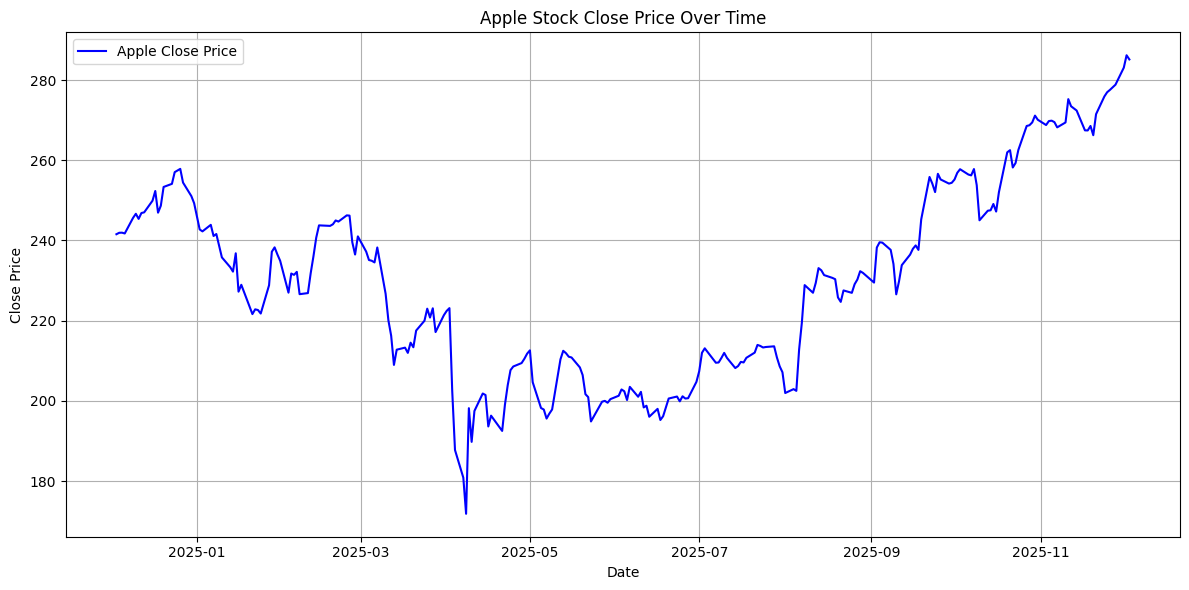

In [95]:
import matplotlib.pyplot as plt

# Plotting the 'Close' price from historical_data
# Convert the index to be timezone-naive for easier plotting with matplotlib
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index.tz_localize(None), historical_data['Close'], label='Apple Close Price', color='blue')
plt.title('Apple Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
